# Importing Libraries

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

# Import Data

In [84]:
import pandas as pd
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [85]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [86]:
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [87]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

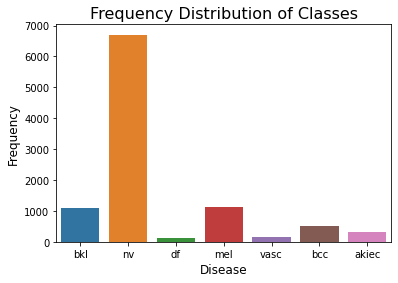

In [88]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

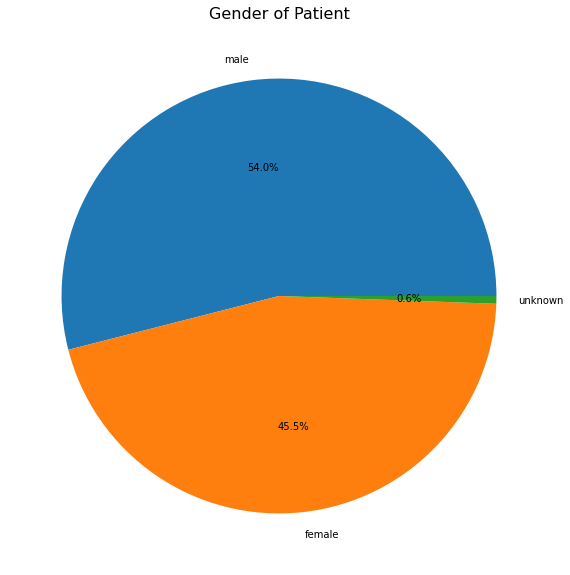

In [89]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

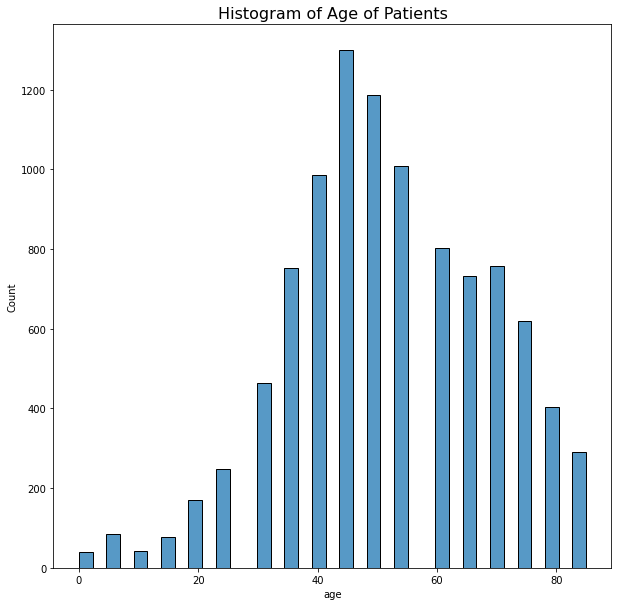

In [90]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

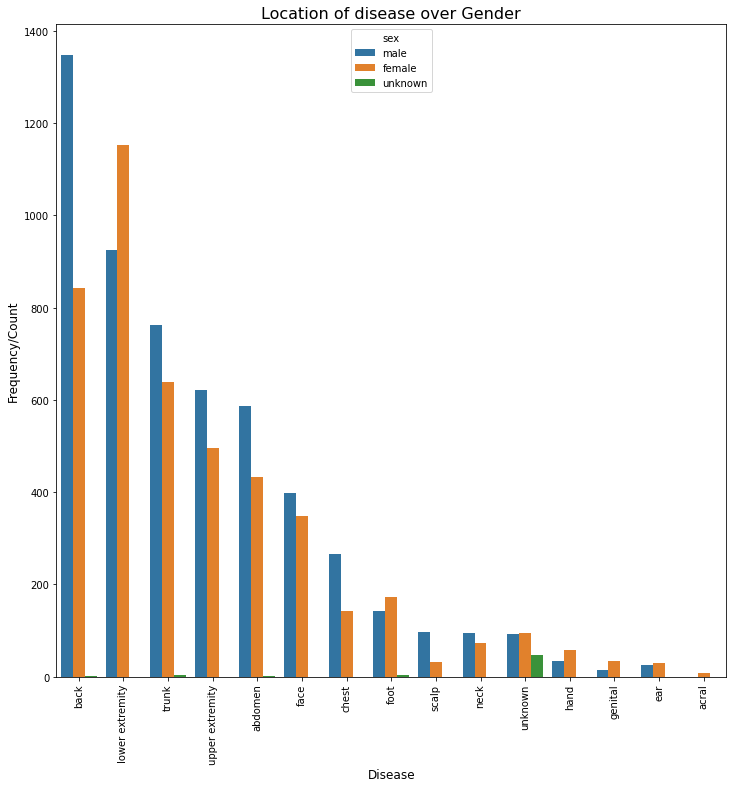

In [91]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace**

In [92]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [93]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


# Standardization and Splitting Data

In [94]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [95]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_267 (Conv2D)          (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_268 (Conv2D)          (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_270 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)            

In [96]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [97]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - 31s 131ms/step - loss: 1.4445 - accuracy: 0.4257 - val_loss: 0.8093 - val_accuracy: 0.6907

Epoch 00001: saving model to best_model.h5
Epoch 2/20
235/235 [==============================] - 31s 130ms/step - loss: 0.6804 - accuracy: 0.7490 - val_loss: 0.5182 - val_accuracy: 0.8068

Epoch 00002: saving model to best_model.h5
Epoch 3/20
235/235 [==============================] - 31s 131ms/step - loss: 0.4236 - accuracy: 0.8470 - val_loss: 0.3513 - val_accuracy: 0.8696

Epoch 00003: saving model to best_model.h5
Epoch 4/20
235/235 [==============================] - 30s 129ms/step - loss: 0.2870 - accuracy: 0.8972 - val_loss: 0.2713 - val_accuracy: 0.8968

Epoch 00004: saving model to best_model.h5
Epoch 5/20
235/235 [==============================] - 30s 128ms/step - loss: 0.2002 - accuracy: 0.9300 - val_loss: 0.2335 - val_accuracy: 0.9136

Epoch 00005: saving model to best_model.h5
Epoch 6/20
235/235 [==============================] - 3

# Plot Accuracy and Loss

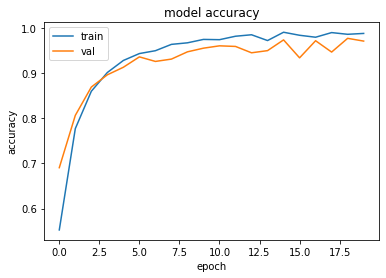

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

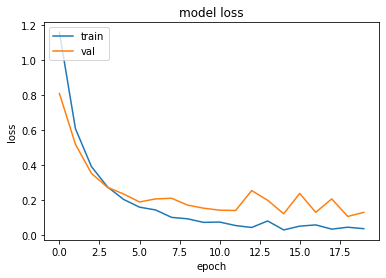

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [100]:
model.load_weights('best_model.h5')


# Model Testing

In [101]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 3s - loss: 0.1404 - accuracy: 0.9697


In [103]:
d1= {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

d2= {
    'nv':0,
    'mel':1,
    'bkl':2,
    'bcc':3,
    'akiec':4,
    'vasc':5,
    'df':6
}

In [105]:
label=[];type=[]
for i in range(len(tabular_data)):
    label.append(d2[tabular_data["dx"][i]])
    type.append(d1[tabular_data["dx"][i]])
tabular_data["label"]=label
tabular_data["type"]=type


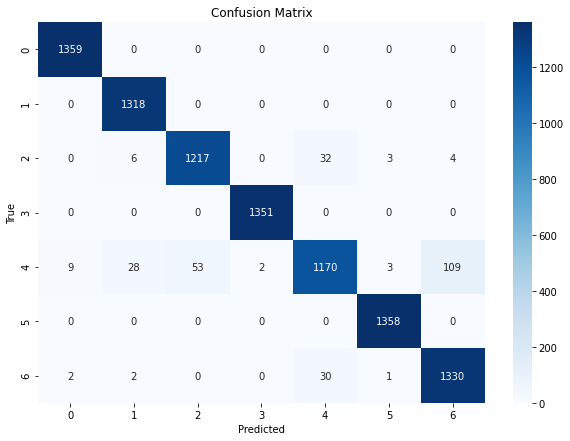

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(Y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


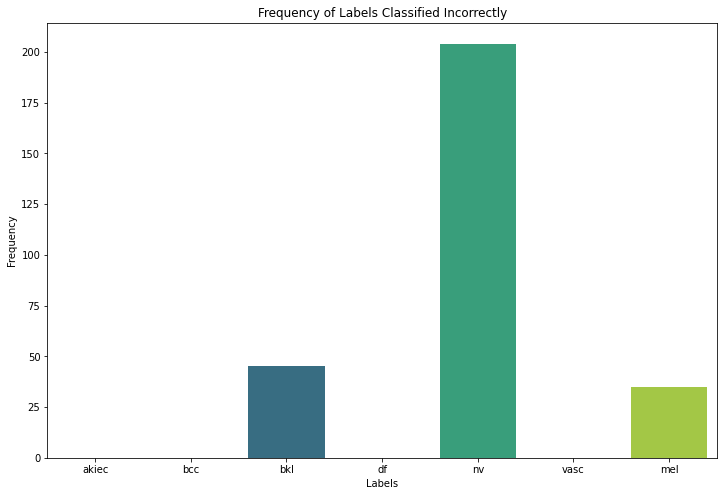

In [111]:
import pandas as pd
import numpy as np

misclassified = Y_test != y_pred_classes
misclassified_labels = Y_test[misclassified]
misclassified_counts = pd.Series(misclassified_labels).value_counts()

complete_index = pd.Index(np.arange(len(classes)))
full_misclassified_counts = misclassified_counts.reindex(complete_index, fill_value=0)

plt.figure(figsize=(12, 8))
sns.barplot(x=full_misclassified_counts.index, y=full_misclassified_counts.values, palette='viridis')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Labels Classified Incorrectly')
plt.xticks(ticks=np.arange(len(classes)), labels=[classes[label][0] for label in full_misclassified_counts.index])
plt.show()


<Figure size 864x576 with 0 Axes>

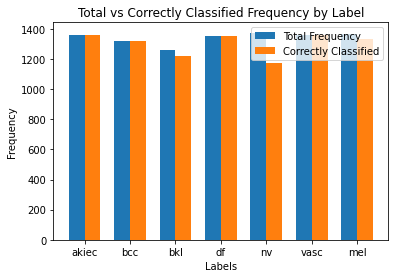

In [112]:
import pandas as pd
import numpy as np

total_counts = pd.Series(Y_test).value_counts()
correctly_classified = Y_test == y_pred_classes
correctly_classified_labels = Y_test[correctly_classified]
correctly_classified_counts = pd.Series(correctly_classified_labels).value_counts()

complete_index = pd.Index(np.arange(len(classes)))
full_total_counts = total_counts.reindex(complete_index, fill_value=0)
full_correctly_classified_counts = correctly_classified_counts.reindex(complete_index, fill_value=0)

plt.figure(figsize=(12, 8))
width = 0.35  
indices = np.arange(len(classes))

fig, ax = plt.subplots()
rects1 = ax.bar(indices - width/2, full_total_counts, width, label='Total Frequency')
rects2 = ax.bar(indices + width/2, full_correctly_classified_counts, width, label='Correctly Classified')

ax.set_xlabel('Labels')
ax.set_ylabel('Frequency')
ax.set_title('Total vs Correctly Classified Frequency by Label')
ax.set_xticks(indices)
ax.set_xticklabels([classes[label][0] for label in full_total_counts.index])
ax.legend()

plt.show()


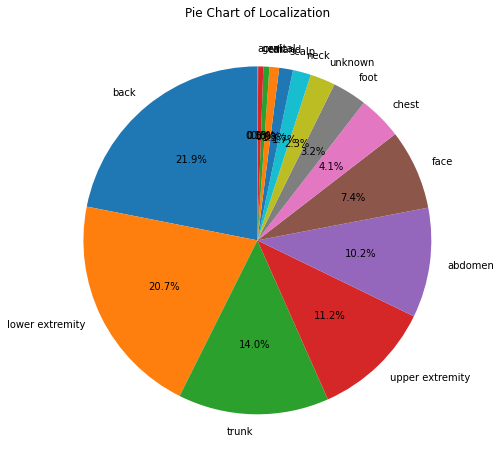

In [113]:
localization_counts = tabular_data['localization'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(localization_counts, labels=localization_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Localization')
plt.show()


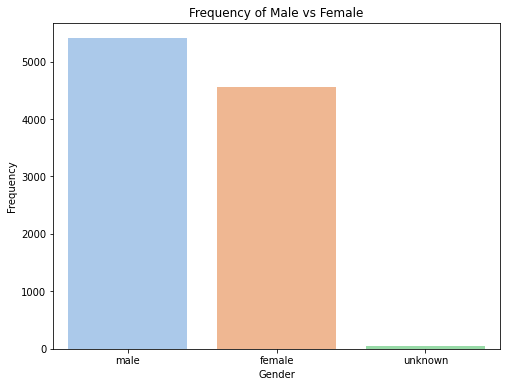

In [114]:
sex_counts = tabular_data['sex'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Male vs Female')
plt.show()


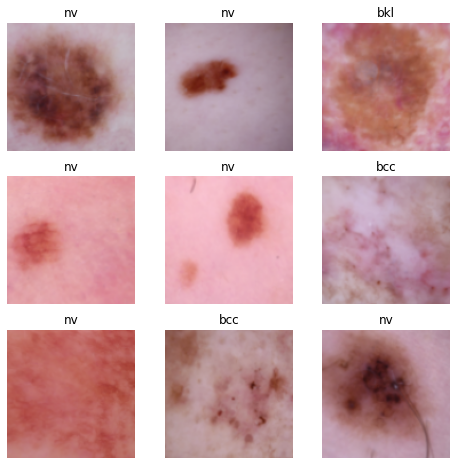

In [124]:
from fastai.vision.all import *
import pandas as pd
import os

base_path = '/kaggle/input/skin-cancer-mnist-ham10000'

tabular_data = pd.read_csv(base_path + '/HAM10000_metadata.csv')

def get_image_path(row):
    image_id = row['image_id']
    for subdir in ['HAM10000_images_part_1', 'HAM10000_images_part_2']:
        path = f"{base_path}/{subdir}/{image_id}.jpg"
        if os.path.exists(path):
            return path
    return None

tabular_data['path'] = tabular_data.apply(get_image_path, axis=1)

tfms = aug_transforms(size=112, min_scale=0.75)
batch_tfms = [*tfms, Normalize.from_stats(*imagenet_stats)]

datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_x=ColReader('path'),
                      get_y=ColReader('dx'),
                      splitter=RandomSplitter(valid_pct=0.2),
                      item_tfms=Resize(112),
                      batch_tfms=batch_tfms)

dls = datablock.dataloaders(tabular_data, bs=16)

dls.show_batch(max_n=9, figsize=(8, 8))
